In [15]:

# Tasks -1:
# On the Heart Disease UCI Dataset, perform the following tasks.

# 1 Data Loading:
# 1.1 Read the dataset into a pandas DataFrame.
# 2 Data Visualization:
# 2.1 Employ several Data Visualization techniques to understand the data better.
# 3 Data Preprocessing:
# 3.1 Handle missing values by using appropriate imputation techniques.
# 3.2 Encode categorical variables using one-hot encoding or label encoding.
# 3.3 Identify and handle outliers if present.
# 4 Normalization:
# 4.1 Scale numerical attributes using techniques like Min-Max Scaling or
# Standardization.
# 5 Prediction:
# 5.1 Build and evaluate a classification model to predict the presence of heart
# disease.


In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#1. Data loading
df = pd.read_csv("https://archive.ics.uci.edu/static/public/45/data.csv")
print("Data loaded successfully !");


Data loaded successfully !


In [17]:
print(df.describe())

              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.438944    0.679868    3.158416  131.689769  246.693069    0.148515   
std      9.038662    0.467299    0.960126   17.599748   51.776918    0.356198   
min     29.000000    0.000000    1.000000   94.000000  126.000000    0.000000   
25%     48.000000    0.000000    3.000000  120.000000  211.000000    0.000000   
50%     56.000000    1.000000    3.000000  130.000000  241.000000    0.000000   
75%     61.000000    1.000000    4.000000  140.000000  275.000000    0.000000   
max     77.000000    1.000000    4.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  299.000000   
mean     0.990099  149.607261    0.326733    1.039604    1.600660    0.672241   
std      0.994971   22.8750

Starting data visualization


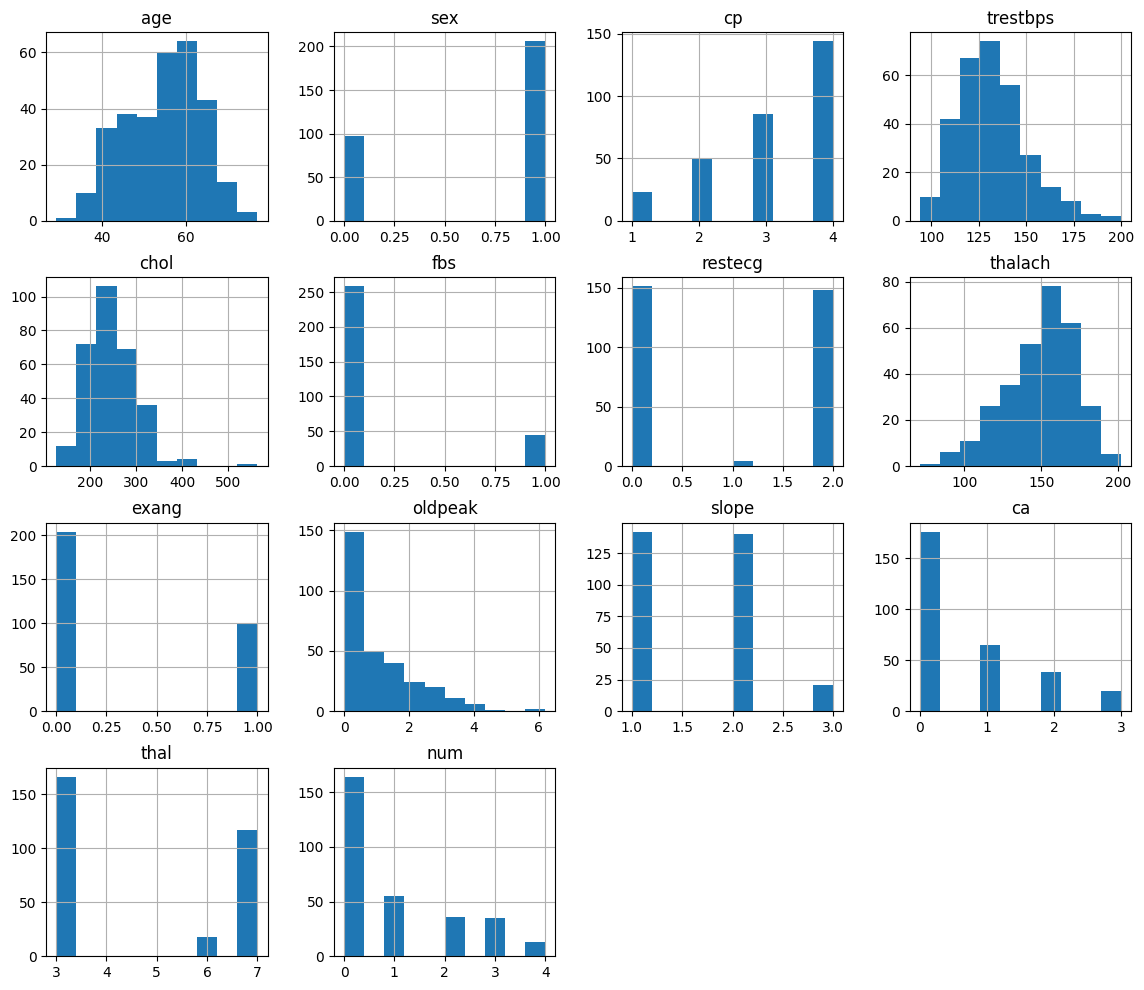

In [18]:
#2. Data visualization
print("Starting data visualization");

df.hist(figsize=(14,12))
plt.show()


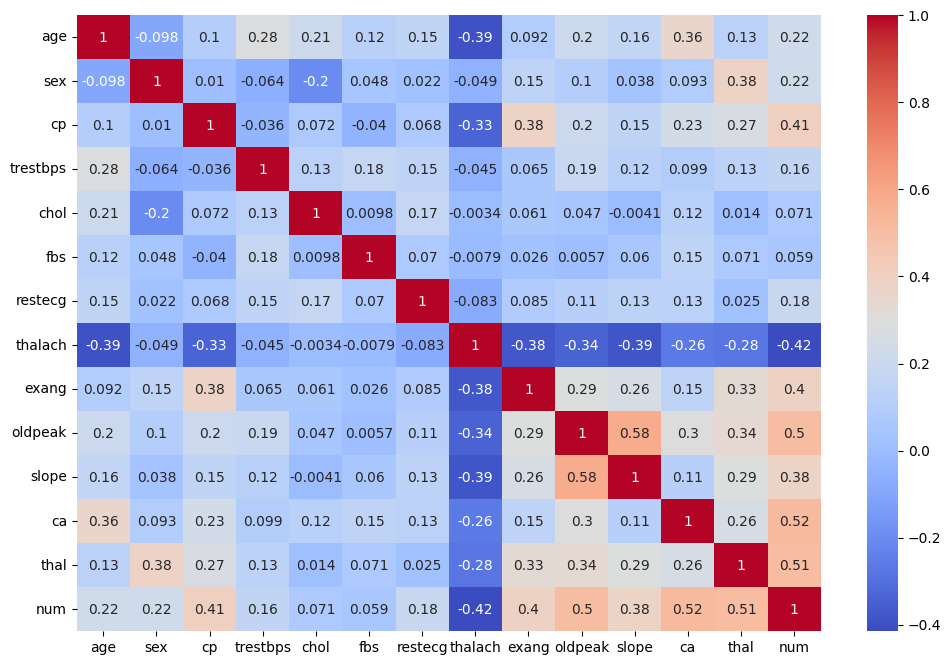

In [19]:
#correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.show();

In [20]:
#3. Data preprocessing
# 3.1 Handle missing values by using appropriate imputation techniques.
# 3.2 Encode categorical variables using one-hot encoding or label encoding.
# 3.3 Identify and handle outliers if present.


# Checking for missing values
print("Missing values:", df.isnull().sum())

Missing values: age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64


In [21]:
print("Shape of df:", df.shape)

Shape of df: (303, 14)


In [22]:
# Impute missing values with the mean for numerical columns
imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Verify if missing values have been imputed
print(df_imputed.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64


In [23]:
# encode categorical variables
df_encoded = pd.get_dummies(df_imputed, drop_first=True)

# Display the first few rows of the encoded DataFrame
print(df_encoded.head())


    age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   

   slope   ca  thal  num  
0    3.0  0.0   6.0  0.0  
1    2.0  3.0   3.0  2.0  
2    2.0  2.0   7.0  1.0  
3    3.0  0.0   3.0  0.0  
4    1.0  0.0   3.0  0.0  


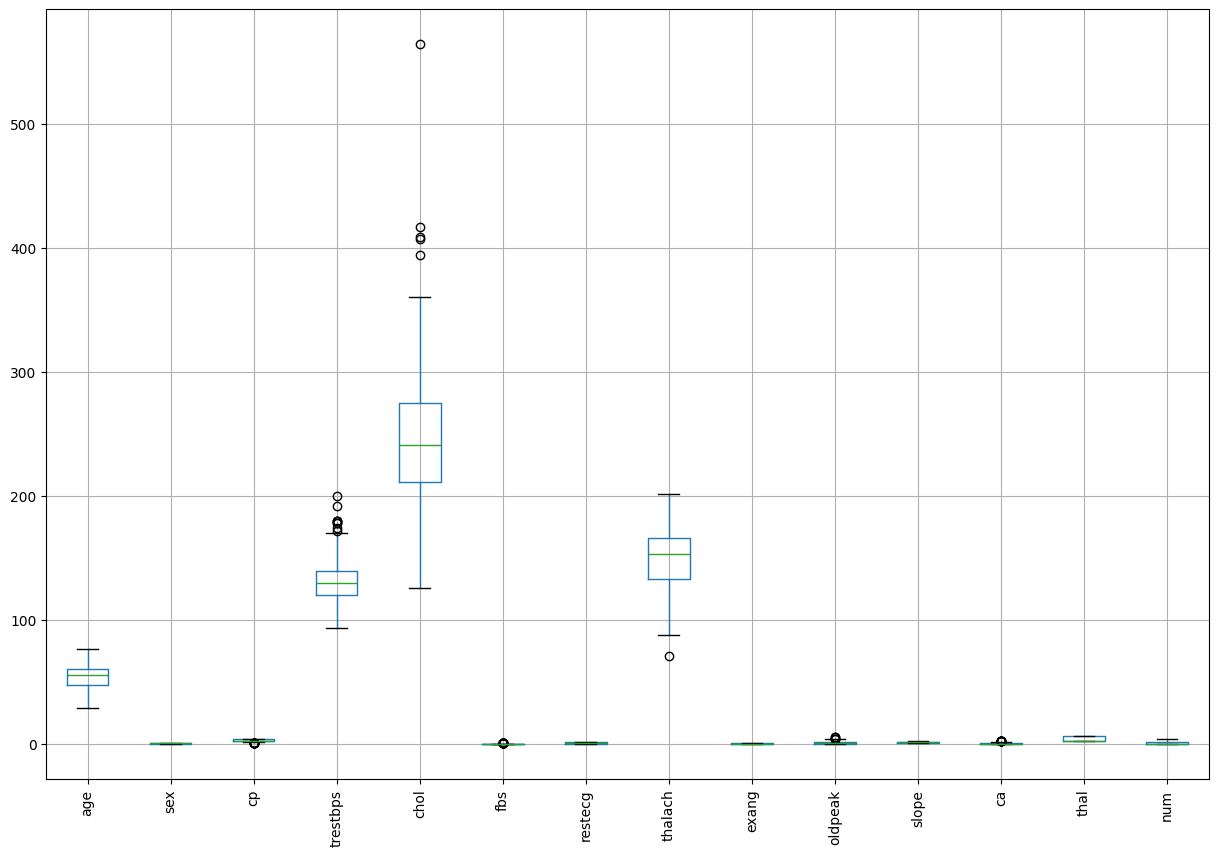

(294, 14)


In [24]:
#Preprocessing --- Box plot to visualize outliers
plt.figure(figsize=(15, 10))
df_encoded.boxplot(rot=90)
plt.show()

# Handling outliers using z-score
# Calculate z-scores of numerical columns
z_scores = zscore(df_encoded)
abs_z_scores = abs(z_scores)

# Define a threshold for identifying outliers
threshold = 3

# Identify rows where any column exceeds the threshold
outliers = (abs_z_scores > threshold).any(axis=1)

# Remove outliers
df_no_outliers = df_encoded[~outliers]

# Verify the shape of the DataFrame after removing outliers
print(df_no_outliers.shape)


In [25]:
#normalization:
# Select numerical columns for scaling
numerical_cols = df_no_outliers.select_dtypes(include=['float64', 'int64']).columns

# Standardize the numerical columns
scaler = StandardScaler()
df_scaled = df_no_outliers.copy()
df_scaled[numerical_cols] = scaler.fit_transform(df_no_outliers[numerical_cols])

# Display the first few rows of the scaled DataFrame
print(df_scaled.head())

        age       sex        cp  trestbps      chol       fbs   restecg  \
0  0.966261  0.669534 -2.228458  0.823495 -0.242431  2.416032  1.034659   
1  1.408066  0.669534  0.886439  1.713814  0.916328 -0.413902  1.034659   
2  1.408066  0.669534  0.886439 -0.660370 -0.329884 -0.413902  1.034659   
3 -1.905473  0.669534 -0.151860 -0.066824  0.129247 -0.413902 -0.979843   
4 -1.463667 -1.493576 -1.190159 -0.066824 -0.876468 -0.413902  1.034659   

    thalach     exang   oldpeak     slope        ca      thal       num  
0  0.006827 -0.696311  1.223393  2.341369 -0.713033  0.680441 -0.748705  
1 -1.866380  1.436141  0.478526  0.686651  2.567778 -0.880287  0.906327  
2 -0.929777  1.436141  1.502719  0.686651  1.474174  1.200684  0.078811  
3  1.657032 -0.696311  2.340694  2.341369 -0.713033 -0.880287 -0.748705  
4  0.988030 -0.696311  0.385418 -0.968066 -0.713033 -0.880287 -0.748705  


In [31]:
# Define features and target variable
X = df_scaled.drop('num', axis=1)
y = df_scaled['num']

# print(np.unique(y))

y_binned = pd.cut(y, bins=3, labels=[0, 1, 2])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_binned, test_size=0.2, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

#model evaluation

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')


[[41  3  0]
 [ 4  1  1]
 [ 8  1  0]]
              precision    recall  f1-score   support

           0       0.77      0.93      0.85        44
           1       0.20      0.17      0.18         6
           2       0.00      0.00      0.00         9

    accuracy                           0.71        59
   macro avg       0.32      0.37      0.34        59
weighted avg       0.60      0.71      0.65        59

Accuracy: 0.711864406779661
